<a href="https://colab.research.google.com/github/MariV24/IA-SPAM/blob/main/SQUAD5_SPAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abordagens para dados desbalanceados interessantes para ajuda na análise:

Overfitting e Underfitting:
- One-side-selection;

#Importando tabela e bibliotecas úteis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import files
uploaded = files.upload()

# Documento necessitou do encoding para poder ser aberto, por questões de dados textuais etc...
df = pd.read_csv('spam.csv', sep=",", encoding="ISO-8859-1")
data = pd.read_csv('spam.csv', sep=",", encoding="ISO-8859-1")

# Link da base de dados (baixar para apresentação)
# https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset?resource=download


# Não adicionando index, pois a tabela não contém. Com a ausência, o próprio Colab cria (tabela autoincremental: 0,1,2...)

Saving spam.csv to spam (2).csv


In [ ]:
# Primeira exibição da tabela, para ver a situação dos dados
df.head(10)

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   
5  spam  FreeMsg Hey there darling it's been 3 week's n...        NaN   
6   ham  Even my brother is not like to speak with me. ...        NaN   
7   ham  As per your request 'Melle Melle (Oru Minnamin...        NaN   
8  spam  WINNER!! As a valued network customer you have...        NaN   
9  spam  Had your mobile 11 months or more? U R entitle...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
5        NaN        NaN  
6        NaN        NaN  
7        NaN        NaN  
8        NaN        NaN  
9        NaN        NaN

In [ ]:
# Visto que há colunas somente com "NAN não contendo informação útil, resolvemos retirá-las

df.drop(["Unnamed: 2", "Unnamed: 3","Unnamed: 4"], axis=1, inplace=True)

In [ ]:
# Renomenando as colunas para melhorar a apresentação

df.rename(columns={'v1': 'Classe', 'v2':'SMS'}, inplace = True)

In [ ]:
# Exibindo as colunas

df.columns

Index(['Classe', 'SMS'], dtype='object')

In [ ]:
# Visualização da tabela aperfeiçõada e pronta para gráficos

df.head(15)

Classe                                                SMS
0     ham  Go until jurong point, crazy.. Available only ...
1     ham                      Ok lar... Joking wif u oni...
2    spam  Free entry in 2 a wkly comp to win FA Cup fina...
3     ham  U dun say so early hor... U c already then say...
4     ham  Nah I don't think he goes to usf, he lives aro...
5    spam  FreeMsg Hey there darling it's been 3 week's n...
6     ham  Even my brother is not like to speak with me. ...
7     ham  As per your request 'Melle Melle (Oru Minnamin...
8    spam  WINNER!! As a valued network customer you have...
9    spam  Had your mobile 11 months or more? U R entitle...
10    ham  I'm gonna be home soon and i don't want to tal...
11   spam  SIX chances to win CASH! From 100 to 20,000 po...
12   spam  URGENT! You have won a 1 week FREE membership ...
13    ham  I've been searching for the right words to tha...
14    ham                I HAVE A DATE ON SUNDAY WITH WILL!!

In [ ]:
# Informações sobre as colunas, nulos e tipos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Classe  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
# Algumas informações sobre o dataframe: contagem, dados únicos, o que mais incidiu e o número de frequência

df.describe() 

Classe                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30

In [ ]:
# SMS que menos aparece

df.SMS.min()

' &lt;#&gt;  in mca. But not conform.'

In [ ]:
#dt = pd.get_dummies(df['Classe'])

In [ ]:
# Contando valores da coluna "Classe"

df['Classe'].value_counts()


ham     4825
spam     747
Name: Classe, dtype: int64

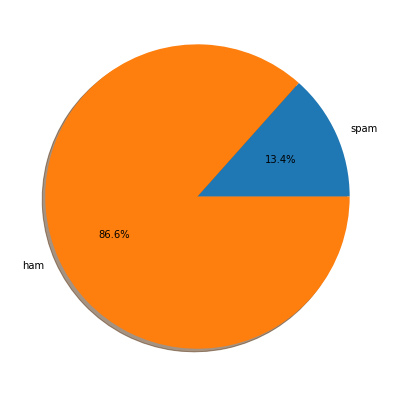

In [ ]:
# Gráfico para mostrar a porcentagem de cada tipo de mensagem

Classe = ['spam', 'ham']
qnt = [747, 4825]
fig=  plt.figure(figsize = (10, 7))
plt.pie(qnt, labels = Classe, autopct = '%1.1f%%', shadow = True)
plt.show()

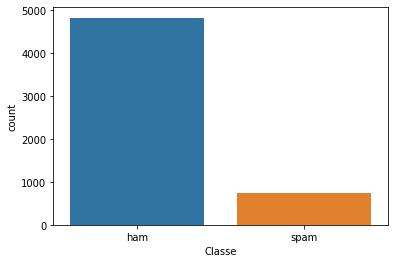

In [ ]:
# Aqui e no gráfico anterior, podemos ver claramente que os dados são desbalanceados

ax = sns.countplot(x = 'Classe', data = df)

# Tratamento de texto

In [ ]:
#Importando biblioteca NLTK para separação, tratamento e alguns gráficos

#from nltk.corpus import treebank
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('treebank')
!pip install svgling
!pip install nltk

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Passando a coluna SMS para a variável frases, de forma que fique tudo em uma só string ( para ser analizado pela biblioteca precisa ser Str)
frases = df['SMS'].to_string(index=False).strip().replace('\n','')
frases

'Go until jurong point, crazy.. Available only i...                     Ok lar... Joking wif u oni...Free entry in 2 a wkly comp to win FA Cup final... U dun say so early hor... U c already then say...Nah I don\'t think he goes to usf, he lives arou...FreeMsg Hey there darling it\'s been 3 week\'s no...Even my brother is not like to speak with me. T...As per your request \'Melle Melle (Oru Minnaminu...WINNER!! As a valued network customer you have ...Had your mobile 11 months or more? U R entitled...I\'m gonna be home soon and i don\'t want to talk...SIX chances to win CASH! From 100 to 20,000 pou...URGENT! You have won a 1 week FREE membership i...I\'ve been searching for the right words to than...               I HAVE A DATE ON SUNDAY WITH WILL!!XXXMobileMovieClub: To use your credit, click t...                        Oh k...i\'m watching here:)Eh u remember how 2 spell his name... Yes i did...Fine if thatåÕs the way u feel. ThatåÕs the way...England v Macedonia - dont miss the goals

In [ ]:
# Trocando informação para outra variável, só pelo nome mesmo. (padrão do nltk)
sentence = frases

# Utilizando tokenize

In [ ]:
# Utilizando comandos tokenize: basicamente slice por espaço
# Relizaremos análise por palavra, por isso estaremos utilizando o tokenize inicialmente.

#Importando a biblioteca
from nltk.tokenize import sent_tokenize, word_tokenize

# Criando a variável tokens para armazenar as palavras grosso modo.
tokens = nltk.word_tokenize(sentence)
tokens

['Go',
 'until',
 'jurong',
 'point',
 ',',
 'crazy',
 '..',
 'Available',
 'only',
 'i',
 '...',
 'Ok',
 'lar',
 '...',
 'Joking',
 'wif',
 'u',
 'oni',
 '...',
 'Free',
 'entry',
 'in',
 '2',
 'a',
 'wkly',
 'comp',
 'to',
 'win',
 'FA',
 'Cup',
 'final',
 '...',
 'U',
 'dun',
 'say',
 'so',
 'early',
 'hor',
 '...',
 'U',
 'c',
 'already',
 'then',
 'say',
 '...',
 'Nah',
 'I',
 'do',
 "n't",
 'think',
 'he',
 'goes',
 'to',
 'usf',
 ',',
 'he',
 'lives',
 'arou',
 '...',
 'FreeMsg',
 'Hey',
 'there',
 'darling',
 'it',
 "'s",
 'been',
 '3',
 'week',
 "'s",
 'no',
 '...',
 'Even',
 'my',
 'brother',
 'is',
 'not',
 'like',
 'to',
 'speak',
 'with',
 'me',
 '.',
 'T',
 '...',
 'As',
 'per',
 'your',
 'request',
 "'Melle",
 'Melle',
 '(',
 'Oru',
 'Minnaminu',
 '...',
 'WINNER',
 '!',
 '!',
 'As',
 'a',
 'valued',
 'network',
 'customer',
 'you',
 'have',
 '...',
 'Had',
 'your',
 'mobile',
 '11',
 'months',
 'or',
 'more',
 '?',
 'U',
 'R',
 'entitled',
 '...',
 'I',
 "'m",
 'gon',
 

# Retirando caracteres especiais

Como podemos observar, quando listamos as palavras que mais se repetem, quase que só aparecem caracteres especiais, pois são muito comuns em mensagens que não sao spam também ( e são 75% das mensagens, basicamente ). Por isso há a necessidade de tirar as irrelevantes para nossas análises.

In [ ]:
# Criando variável para armazenar a lista filtrada

filtered_list = []

In [ ]:
# Lógica utilizando função str.translate().
# Ele mapeia cada caractere da string por meio de uma tabela de tradução criada usando a função str.maketrans()

if __name__ == '__main__':
 
    ss = tokens
    to_remove = [',','.', '$', ';', '...', '..', ';;', ';;;', '(', ')', ':', '2', '?', '!', '-', '_', 'u', 've','&', 'll',  's', 'm', 'U', 'nt', 'Ill', 'ur', 'got', '4', 'lt', 'gt', '#', 'Ok', '<', '>', 'Al','k', 'Hmmm', 'Hmm', 'hm', 'hmm', 'Haha', 'Ha', 'usf', 'l', 'th', 'l','*' ]

    chars = set(to_remove)
    filtered_list = ';'.join(filter(lambda x: x not in chars, ss))
    print(filtered_list)

Go;until;jurong;point;crazy;Available;only;i;lar;Joking;wif;oni;Free;entry;in;a;wkly;comp;to;win;FA;Cup;final;dun;say;so;early;hor;c;already;then;say;Nah;I;do;n't;think;he;goes;to;he;lives;arou;FreeMsg;Hey;there;darling;it;'s;been;3;week;'s;no;Even;my;brother;is;not;like;to;speak;with;me;T;As;per;your;request;'Melle;Melle;Oru;Minnaminu;WINNER;As;a;valued;network;customer;you;have;Had;your;mobile;11;months;or;more;R;entitled;I;'m;gon;na;be;home;soon;and;i;do;n't;want;to;talk;SIX;chances;to;win;CASH;From;100;to;20,000;pou;URGENT;You;have;won;a;1;week;FREE;membership;i;I;'ve;been;searching;for;the;right;words;to;than;I;HAVE;A;DATE;ON;SUNDAY;WITH;WILL;XXXMobileMovieClub;To;use;your;credit;click;t;Oh;i;'m;watching;here;Eh;remember;how;spell;his;name;Yes;i;did;Fine;if;thatåÕs;the;way;feel;ThatåÕs;the;way;England;v;Macedonia;dont;miss;the;goals/team;Is;that;seriously;how;you;spell;his;name;IÛ÷m;going;to;try;for;months;ha;ha;only;jokingSo;Ì_;pay;first;lar;Then;when;is;da;stock;co;Aft;i;finish

In [ ]:
# Passando para uma nova variável e dizendo para onde tiver ';' colocado anteriormente, substituir por 'espaço'.

words = filtered_list.replace(";", " ")

In [ ]:
# Vendo o resultado

words

"Go until jurong point crazy Available only i lar Joking wif oni Free entry in a wkly comp to win FA Cup final dun say so early hor c already then say Nah I do n't think he goes to he lives arou FreeMsg Hey there darling it 's been 3 week 's no Even my brother is not like to speak with me T As per your request 'Melle Melle Oru Minnaminu WINNER As a valued network customer you have Had your mobile 11 months or more R entitled I 'm gon na be home soon and i do n't want to talk SIX chances to win CASH From 100 to 20,000 pou URGENT You have won a 1 week FREE membership i I 've been searching for the right words to than I HAVE A DATE ON SUNDAY WITH WILL XXXMobileMovieClub To use your credit click t Oh i 'm watching here Eh remember how spell his name Yes i did Fine if thatåÕs the way feel ThatåÕs the way England v Macedonia dont miss the goals/team Is that seriously how you spell his name I\x89Û÷m going to try for months ha ha only jokingSo Ì_ pay first lar Then when is da stock co Aft i fi

In [ ]:
# Utilizando replace() para substituir as ' das contrações por espaço em branco

sem_aspas = words.replace("'", "")
print(sem_aspas)

Go until jurong point crazy Available only i lar Joking wif oni Free entry in a wkly comp to win FA Cup final dun say so early hor c already then say Nah I do nt think he goes to he lives arou FreeMsg Hey there darling it s been 3 week s no Even my brother is not like to speak with me T As per your request Melle Melle Oru Minnaminu WINNER As a valued network customer you have Had your mobile 11 months or more R entitled I m gon na be home soon and i do nt want to talk SIX chances to win CASH From 100 to 20,000 pou URGENT You have won a 1 week FREE membership i I ve been searching for the right words to than I HAVE A DATE ON SUNDAY WITH WILL XXXMobileMovieClub To use your credit click t Oh i m watching here Eh remember how spell his name Yes i did Fine if thatåÕs the way feel ThatåÕs the way England v Macedonia dont miss the goals/team Is that seriously how you spell his name IÛ÷m going to try for months ha ha only jokingSo Ì_ pay first lar Then when is da stock co Aft i finish my lunc

Tentativa de retirar palavras que são somente uma letra

In [ ]:
# Importando a biblioteca String para ter acesso ao 'método' de mostrar o alfabeto e o colocar em uma lista 'a'

import string
a = list(string.ascii_lowercase)
print(a)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [ ]:
# Passando a string para lista com o 'tokenize' em uma nova variável

wordss = word_tokenize(sem_aspas)

In [ ]:
# Mostrando o resultado 

print(wordss) 

['Go', 'until', 'jurong', 'point', 'crazy', 'Available', 'only', 'i', 'lar', 'Joking', 'wif', 'oni', 'Free', 'entry', 'in', 'a', 'wkly', 'comp', 'to', 'win', 'FA', 'Cup', 'final', 'dun', 'say', 'so', 'early', 'hor', 'c', 'already', 'then', 'say', 'Nah', 'I', 'do', 'nt', 'think', 'he', 'goes', 'to', 'he', 'lives', 'arou', 'FreeMsg', 'Hey', 'there', 'darling', 'it', 's', 'been', '3', 'week', 's', 'no', 'Even', 'my', 'brother', 'is', 'not', 'like', 'to', 'speak', 'with', 'me', 'T', 'As', 'per', 'your', 'request', 'Melle', 'Melle', 'Oru', 'Minnaminu', 'WINNER', 'As', 'a', 'valued', 'network', 'customer', 'you', 'have', 'Had', 'your', 'mobile', '11', 'months', 'or', 'more', 'R', 'entitled', 'I', 'm', 'gon', 'na', 'be', 'home', 'soon', 'and', 'i', 'do', 'nt', 'want', 'to', 'talk', 'SIX', 'chances', 'to', 'win', 'CASH', 'From', '100', 'to', '20,000', 'pou', 'URGENT', 'You', 'have', 'won', 'a', '1', 'week', 'FREE', 'membership', 'i', 'I', 've', 'been', 'searching', 'for', 'the', 'right', 'word

In [ ]:
# Definindo uma nova variável para a lista filtrada das remoção das letras soltas

sem_letra = []

In [ ]:
# removendo as letras com uma lógica de passar palavra por palavra dentro da lista 'a' que tiver na lista 'wordss' e as ausentando da nova lista 'sem_letra'

for word in wordss:
  if word not in a:
    sem_letra.append(word)

In [ ]:
# Mostrando o resultado

print(sem_letra)

['Go', 'until', 'jurong', 'point', 'crazy', 'Available', 'only', 'lar', 'Joking', 'wif', 'oni', 'Free', 'entry', 'in', 'wkly', 'comp', 'to', 'win', 'FA', 'Cup', 'final', 'dun', 'say', 'so', 'early', 'hor', 'already', 'then', 'say', 'Nah', 'I', 'do', 'nt', 'think', 'he', 'goes', 'to', 'he', 'lives', 'arou', 'FreeMsg', 'Hey', 'there', 'darling', 'it', 'been', '3', 'week', 'no', 'Even', 'my', 'brother', 'is', 'not', 'like', 'to', 'speak', 'with', 'me', 'T', 'As', 'per', 'your', 'request', 'Melle', 'Melle', 'Oru', 'Minnaminu', 'WINNER', 'As', 'valued', 'network', 'customer', 'you', 'have', 'Had', 'your', 'mobile', '11', 'months', 'or', 'more', 'R', 'entitled', 'I', 'gon', 'na', 'be', 'home', 'soon', 'and', 'do', 'nt', 'want', 'to', 'talk', 'SIX', 'chances', 'to', 'win', 'CASH', 'From', '100', 'to', '20,000', 'pou', 'URGENT', 'You', 'have', 'won', '1', 'week', 'FREE', 'membership', 'I', 've', 'been', 'searching', 'for', 'the', 'right', 'words', 'to', 'than', 'I', 'HAVE', 'A', 'DATE', 'ON', 

# Frequência dos termos

In [ ]:
#Utilizando nltk para gráfico de linha: palavra x frequência

from nltk import FreqDist #Importando
dist_freq = FreqDist(sem_letra) #Definindo uma variável com elementos aceitos pelo FreqDist (palavras)
print(dist_freq) #Output quantitativo se samples

<FreqDist with 7933 samples and 42971 outcomes>


In [ ]:
# Exibindo os 20 mais comuns
dist_freq.most_common(20)

[('I', 1349),
 ('you', 1081),
 ('to', 985),
 ('the', 590),
 ('in', 476),
 ('is', 469),
 ('me', 371),
 ('my', 363),
 ('and', 338),
 ('for', 319),
 ('your', 305),
 ('have', 294),
 ('it', 290),
 ('of', 286),
 ('that', 271),
 ('are', 269),
 ('do', 232),
 ('not', 231),
 ('on', 228),
 ('at', 208)]

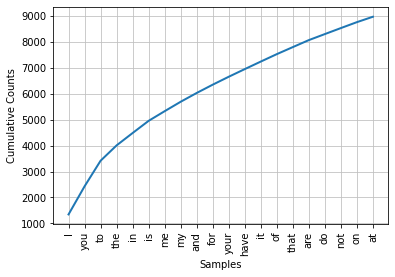

In [ ]:
# Gráfico de palavras mais frequentes sem passar pelas 'stopwords'

dist_freq.plot(20, cumulative=True)

# Stopwords

In [ ]:
# Importando as 'stopwords', as palavras que queremos ignorar, como 'in', 'is' e 'an'.
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Definindo para a lingua inglesa (idioma que estão as frases dos dados)
stop_words = set(stopwords.words("english"))

In [ ]:
# Mostrando quais são as 'stopwords'

print(stop_words)

{'were', 'hers', "haven't", 'both', 'my', 'ma', 'this', "it's", 'wasn', 'she', 'as', 'ours', 'to', 'where', 'again', 'it', 'same', "needn't", 'too', "mightn't", 'other', 'was', 'do', 'below', 'o', 'through', 'not', "mustn't", 're', 'her', 'him', 'doing', 'of', 'at', 'won', "shouldn't", 'didn', "couldn't", "don't", 'herself', 'under', 'those', 'm', 'against', 'any', 'its', 'their', 'isn', 'why', "hasn't", 'shouldn', 'or', 's', 'mustn', 'during', 'into', 'aren', 'needn', 'd', 'y', 'after', 'a', 'doesn', 'll', "weren't", 'itself', 'there', "should've", "you'd", 'his', "didn't", 'weren', 'more', 'is', 'how', 'up', 'on', 'will', 'ain', 'theirs', 't', 'until', 'whom', 'all', 'so', 'i', 'just', 'most', 'own', 'what', 'have', 'are', 'me', 'yourselves', 'be', 'myself', 'does', 'and', 'your', "shan't", "isn't", 'off', 'here', 'being', 'that', 'now', 'they', 'hadn', "she's", 'has', 'mightn', 'while', 'few', 'out', 'very', 'hasn', "that'll", 'been', 'from', 'some', 'yours', 'did', 'further', 've',

In [ ]:
# Criando uma lista para colocar as palavras filtradas
filtered_stopwords = []

In [ ]:
# Lógica para cara palavra na lista feita anterior, a máquina verificará se está nas stopwords e adicionará na lista se não estiver.
for word in sem_letra:
  if word not in stop_words:
    filtered_stopwords.append(word)

In [ ]:
# Exibindo a lista de palavras filtradas
print(filtered_stopwords)

# Foi filtrado palavras como verbo to be "am" e artigos "a", como também o advérbio de negação "not".
# Para identificação de SPAM, palavras e sentenças no imperativo são mais relevantes, então podemos deixar as palavras filtradas como estão.

['Go', 'jurong', 'point', 'crazy', 'Available', 'lar', 'Joking', 'wif', 'oni', 'Free', 'entry', 'wkly', 'comp', 'win', 'FA', 'Cup', 'final', 'dun', 'say', 'early', 'hor', 'already', 'say', 'Nah', 'I', 'nt', 'think', 'goes', 'lives', 'arou', 'FreeMsg', 'Hey', 'darling', '3', 'week', 'Even', 'brother', 'like', 'speak', 'T', 'As', 'per', 'request', 'Melle', 'Melle', 'Oru', 'Minnaminu', 'WINNER', 'As', 'valued', 'network', 'customer', 'Had', 'mobile', '11', 'months', 'R', 'entitled', 'I', 'gon', 'na', 'home', 'soon', 'nt', 'want', 'talk', 'SIX', 'chances', 'win', 'CASH', 'From', '100', '20,000', 'pou', 'URGENT', 'You', '1', 'week', 'FREE', 'membership', 'I', 'searching', 'right', 'words', 'I', 'HAVE', 'A', 'DATE', 'ON', 'SUNDAY', 'WITH', 'WILL', 'XXXMobileMovieClub', 'To', 'use', 'credit', 'click', 'Oh', 'watching', 'Eh', 'remember', 'spell', 'name', 'Yes', 'Fine', 'thatåÕs', 'way', 'feel', 'ThatåÕs', 'way', 'England', 'Macedonia', 'dont', 'miss', 'goals/team', 'Is', 'seriously', 'spell', 

Re-vendo a frequência das palavras

In [ ]:
#Utilizando novamente o nltk para gráfico de linha: palavra x frequência

dist_freq = FreqDist(filtered_stopwords) #Definindo uma variável com elementos aceitos pelo FreqDist (palavras)
print(dist_freq) #Output quantitativo se samples

<FreqDist with 7812 samples and 29585 outcomes>


In [ ]:
# Exibindo os 50 mais comuns
dist_freq.most_common(50)

[('I', 1349),
 ('You', 196),
 ('nt', 194),
 ('call', 191),
 ('get', 169),
 ('know', 151),
 ('go', 134),
 ('No', 133),
 ('come', 129),
 ('like', 124),
 ('How', 122),
 ('lor', 113),
 ('da', 110),
 ('going', 108),
 ('time', 106),
 ('home', 103),
 ('want', 97),
 ('good', 96),
 ('What', 94),
 ('Sorry', 93),
 ('Ì_', 91),
 ('We', 91),
 ('day', 89),
 ('still', 88),
 ('Hey', 84),
 ('need', 81),
 ('ok', 79),
 ('Your', 79),
 ('one', 79),
 ('Just', 77),
 ('Do', 76),
 ('So', 75),
 ('see', 72),
 ('think', 71),
 ('love', 71),
 ('send', 68),
 ('Hi', 68),
 ('But', 67),
 ('na', 66),
 ('back', 64),
 ('....', 63),
 ('Oh', 62),
 ('dont', 62),
 ('later', 62),
 ('If', 62),
 ('It', 62),
 ('The', 61),
 ('today', 61),
 ('K', 60),
 ('new', 59)]

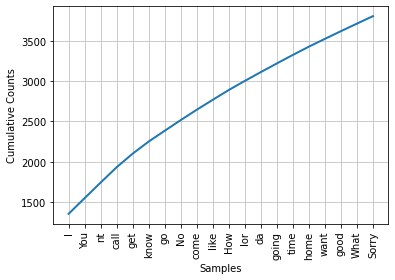

In [ ]:
# Gráfico de palavras mais frequentes sem passar pelas 'stopwords'

dist_freq.plot(20, cumulative=True)

In [ ]:
# Podemos ver que ainda restaram alguns pronomes, que não são relevantes para a nossa análise. Eles precisam ser retirados antes da próxima fase.

Re-fazendo filtragem por ainda haver vestígios

In [ ]:
b = ['I', 'You', 'nt', 'lor', 'da', 'Ì_', '....', 'K', 'Oh', 'na', 'We', 'ok', 'Hi', 'hi', 'Ior', 'lar', 'Nah', 'oni', 'hor', 'Hey', 'A', 'B', 'C', 'D', 'wif', 'dun', 'T', 'Eh']

In [ ]:
u_filtro = []

In [ ]:
# Lógica para cara palavra na lista feita anterior, a máquina verificará se está nas stopwords e adicionará na lista se não estiver.
for word in filtered_stopwords:
  if word not in b:
    u_filtro.append(word)

In [ ]:
# Mostrando resultado

print(u_filtro)

['Go', 'jurong', 'point', 'crazy', 'Available', 'Joking', 'Free', 'entry', 'wkly', 'comp', 'win', 'FA', 'Cup', 'final', 'say', 'early', 'already', 'say', 'think', 'goes', 'lives', 'arou', 'FreeMsg', 'darling', '3', 'week', 'Even', 'brother', 'like', 'speak', 'As', 'per', 'request', 'Melle', 'Melle', 'Oru', 'Minnaminu', 'WINNER', 'As', 'valued', 'network', 'customer', 'Had', 'mobile', '11', 'months', 'R', 'entitled', 'gon', 'home', 'soon', 'want', 'talk', 'SIX', 'chances', 'win', 'CASH', 'From', '100', '20,000', 'pou', 'URGENT', '1', 'week', 'FREE', 'membership', 'searching', 'right', 'words', 'HAVE', 'DATE', 'ON', 'SUNDAY', 'WITH', 'WILL', 'XXXMobileMovieClub', 'To', 'use', 'credit', 'click', 'watching', 'remember', 'spell', 'name', 'Yes', 'Fine', 'thatåÕs', 'way', 'feel', 'ThatåÕs', 'way', 'England', 'Macedonia', 'dont', 'miss', 'goals/team', 'Is', 'seriously', 'spell', 'name', 'I\x89Û÷m', 'going', 'try', 'months', 'ha', 'ha', 'jokingSo', 'pay', 'first', 'Then', 'stock', 'co', 'Aft', 

Re-fazendo a frequência

In [ ]:
dist_freq = FreqDist(u_filtro) #Definindo uma variável com elementos aceitos pelo FreqDist (palavras)
print(dist_freq) #Output quantitativo se samples

<FreqDist with 7785 samples and 26740 outcomes>


In [ ]:
# Exibindo os 20 mais comuns
dist_freq.most_common(20)

[('call', 191),
 ('get', 169),
 ('know', 151),
 ('go', 134),
 ('No', 133),
 ('come', 129),
 ('like', 124),
 ('How', 122),
 ('going', 108),
 ('time', 106),
 ('home', 103),
 ('want', 97),
 ('good', 96),
 ('What', 94),
 ('Sorry', 93),
 ('day', 89),
 ('still', 88),
 ('need', 81),
 ('Your', 79),
 ('one', 79)]

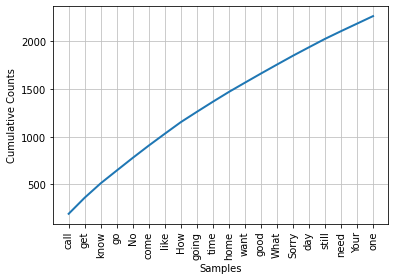

In [ ]:
# Agora tendo um resultado menos poluído por caracteres que não são úteis, podemos prosseguir.

dist_freq.plot(20, cumulative=True)

# Nuvem de palavras

In [ ]:
# Chamando a variável mais recente de tratamentos finalizada e a transformando em outra variável com formato String

filtroStr = str(u_filtro)

In [ ]:
# Vendo de o resultado continua igual. Sim, porém temos que tratar as aspas agora.

print(filtroStr)

['Go', 'jurong', 'point', 'crazy', 'Available', 'Joking', 'Free', 'entry', 'wkly', 'comp', 'win', 'FA', 'Cup', 'final', 'say', 'early', 'already', 'say', 'think', 'goes', 'lives', 'arou', 'FreeMsg', 'darling', '3', 'week', 'Even', 'brother', 'like', 'speak', 'As', 'per', 'request', 'Melle', 'Melle', 'Oru', 'Minnaminu', 'WINNER', 'As', 'valued', 'network', 'customer', 'Had', 'mobile', '11', 'months', 'R', 'entitled', 'gon', 'home', 'soon', 'want', 'talk', 'SIX', 'chances', 'win', 'CASH', 'From', '100', '20,000', 'pou', 'URGENT', '1', 'week', 'FREE', 'membership', 'searching', 'right', 'words', 'HAVE', 'DATE', 'ON', 'SUNDAY', 'WITH', 'WILL', 'XXXMobileMovieClub', 'To', 'use', 'credit', 'click', 'watching', 'remember', 'spell', 'name', 'Yes', 'Fine', 'thatåÕs', 'way', 'feel', 'ThatåÕs', 'way', 'England', 'Macedonia', 'dont', 'miss', 'goals/team', 'Is', 'seriously', 'spell', 'name', 'I\x89Û÷m', 'going', 'try', 'months', 'ha', 'ha', 'jokingSo', 'pay', 'first', 'Then', 'stock', 'co', 'Aft', 

In [ ]:
# Retirando as aspas

sem_aspas2 = filtroStr.replace("'", "")

In [ ]:
# Conferindo o resultado

print(sem_aspas2)

[Go, jurong, point, crazy, Available, Joking, Free, entry, wkly, comp, win, FA, Cup, final, say, early, already, say, think, goes, lives, arou, FreeMsg, darling, 3, week, Even, brother, like, speak, As, per, request, Melle, Melle, Oru, Minnaminu, WINNER, As, valued, network, customer, Had, mobile, 11, months, R, entitled, gon, home, soon, want, talk, SIX, chances, win, CASH, From, 100, 20,000, pou, URGENT, 1, week, FREE, membership, searching, right, words, HAVE, DATE, ON, SUNDAY, WITH, WILL, XXXMobileMovieClub, To, use, credit, click, watching, remember, spell, name, Yes, Fine, thatåÕs, way, feel, ThatåÕs, way, England, Macedonia, dont, miss, goals/team, Is, seriously, spell, name, I\x89Û÷m, going, try, months, ha, ha, jokingSo, pay, first, Then, stock, co, Aft, finish, lunch, go, str, Ffffffffff, Alright, way, meet, Just, forced, eat, slice, really, Lol, always, convincing.Did, catch, bus, Are, frying, egg, back, amp, packing, car, Ahhh, Work, vaguely, remember, What, Wait, still, cl

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
# lista de stopword do WordCloud
stopwords = set(STOPWORDS)

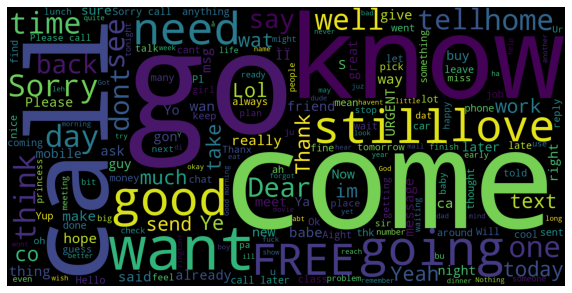

In [ ]:
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(sem_aspas2)
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);
wordcloud.to_file("airbnb_summary_wordcloud.png")

# Curiosidade: Quantitativo de palavras antes x depois do tratamento

In [ ]:
#Listagem de todas as palavras antes do tratamento
print("Palavras total: "+str(len(tokens)))

Palavras total: 57686


In [ ]:
#Listagem de todas as palavras após o tratamento
print("Palavras total: "+str(len(u_filtro)))

Palavras total: 26740


In [ ]:
# Passando valores para formato de dataframe

qntPalavras = {
        'Valores':{0:int(57686),
                   1:int(26740)},
        'Tempo':{0:'Antes',
                 1:'Depois'}
}

In [ ]:
# Transformando em dataframe para que possa ser plotado

data = pd.DataFrame(qntPalavras)

print(data) # Verificando o resultado

   Valores   Tempo
0    57686   Antes
1    26740  Depois


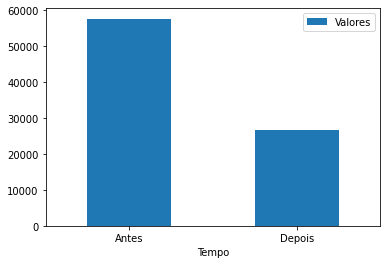

In [ ]:
# Mostrando graficamente

ax = data.plot.bar(x='Tempo', y='Valores', rot=0)

# Curiosidade : Número de palavras únicas na base de dados

In [ ]:
# Quantidade de palavras únicas antes do tratamento

words_unique = sorted(set(tokens))
print("Palavras únicas: "+str(len(words_unique)))

Palavras únicas: 8020


In [ ]:
words_unique2 = sorted(set(u_filtro))
print("Palavras únicas: "+str(len(words_unique2)))

Palavras únicas: 7785


In [ ]:
# Passando valores para formato de dataframe

qntPalavrasUnicas = {
        'Valores':{0:int(8020),
                   1:int(7785)},
        'Tempo':{0:str('Antes'),
                 1:str('Depois')}
}

In [ ]:
# Transformando em dataframe para que possa ser plotado

data2 = pd.DataFrame(qntPalavrasUnicas)

print(data2) # Verificando o resultado

   Valores   Tempo
0     8020   Antes
1     7785  Depois


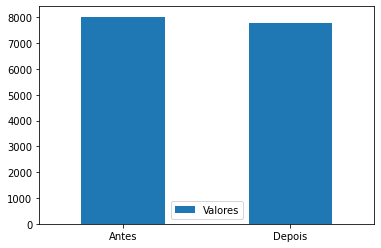

In [ ]:
# Transformando em database e plotando.

Valores = [8020, 7785]
index = ['Antes', 'Depois']
dataf = pd.DataFrame({'Valores': Valores}, index=index)
ax = dataf.plot.bar(rot=0)

# No gráfico de barras não está visualmente agradável e notável diferenças por serem poucas

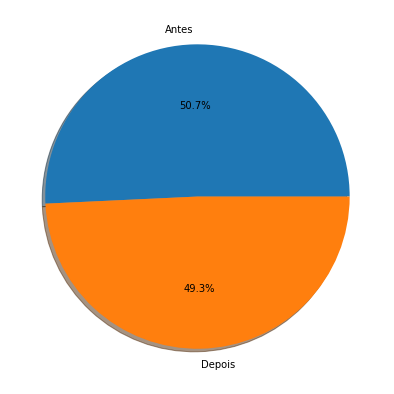

In [ ]:
# Plotamos em gráfico de pizza para ficar melhor de visualizar

Classe = ['Antes', 'Depois']
qnt = [8020, 7785]
fig=  plt.figure(figsize = (10, 7))
plt.pie(qnt, labels = Classe, autopct = '%1.1f%%', shadow = True)
plt.show()

# Separando mensagens Spam de Ham

In [ ]:
# Salvando o dataframe em outra variável para o deixar a salvo de modificações

subs = df

In [ ]:
# Conferindo as colunas

subs.columns

Index(['Classe', 'SMS'], dtype='object')

In [ ]:
# Definindo os valores da coluna "Classe" do dataframe para valores de 0 ou 1 para facilitar

subs["Classe"] = subs["Classe"].map({"spam": 1, "ham":0})

In [ ]:
# Filtrando pelo critério da coluna "Classe" ser igual a '1' (Spam)

filtroSpam  = df['Classe'] == 1
filtro_Spam = df[filtroSpam]

In [ ]:
# Mostrando resultado

print(filtro_Spam)

      Classe                                                SMS
2          1  Free entry in 2 a wkly comp to win FA Cup fina...
5          1  FreeMsg Hey there darling it's been 3 week's n...
8          1  WINNER!! As a valued network customer you have...
9          1  Had your mobile 11 months or more? U R entitle...
11         1  SIX chances to win CASH! From 100 to 20,000 po...
...      ...                                                ...
5537       1  Want explicit SEX in 30 secs? Ring 02073162414...
5540       1  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547       1  Had your contract mobile 11 Mnths? Latest Moto...
5566       1  REMINDER FROM O2: To get 2.50 pounds free call...
5567       1  This is the 2nd time we have tried 2 contact u...

[747 rows x 2 columns]


In [ ]:
print(type(filtro_Spam))

<class 'pandas.core.frame.DataFrame'>


##Fazendo algumas análises

In [ ]:
# Mudando o dataframe cortado de nome

dat = filtro_Spam

In [ ]:
# Passando para string para poder analisar

frases1 = dat['SMS'].to_string(index=False).strip().replace('\n','')
frases1

'Free entry in 2 a wkly comp to win FA Cup final...FreeMsg Hey there darling it\'s been 3 week\'s no...WINNER!! As a valued network customer you have ...Had your mobile 11 months or more? U R entitled...SIX chances to win CASH! From 100 to 20,000 pou...URGENT! You have won a 1 week FREE membership i...XXXMobileMovieClub: To use your credit, click t...England v Macedonia - dont miss the goals/team ...Thanks for your subscription to Ringtone UK you...07732584351 - Rodger Burns - MSG = We tried to ...SMS. ac Sptv: The New Jersey Devils and the Det...Congrats! 1 year special cinema pass for 2 is y...As a valued customer, I am pleased to advise yo...Urgent UR awarded a complimentary trip to EuroD...Did you hear about the new \\Divorce Barbie\\"? I...Please call our customer service representative...Your free ringtone is waiting to be collected. ...GENT! We are trying to contact you. Last weeken...You are a winner U have been specially selected...PRIVATE! Your 2004 Account Statement for 0774

In [ ]:
# Utilizando o tokenize para separar as palavras

tokens1 = nltk.word_tokenize(frases1)
tokens1

['Free',
 'entry',
 'in',
 '2',
 'a',
 'wkly',
 'comp',
 'to',
 'win',
 'FA',
 'Cup',
 'final',
 '...',
 'FreeMsg',
 'Hey',
 'there',
 'darling',
 'it',
 "'s",
 'been',
 '3',
 'week',
 "'s",
 'no',
 '...',
 'WINNER',
 '!',
 '!',
 'As',
 'a',
 'valued',
 'network',
 'customer',
 'you',
 'have',
 '...',
 'Had',
 'your',
 'mobile',
 '11',
 'months',
 'or',
 'more',
 '?',
 'U',
 'R',
 'entitled',
 '...',
 'SIX',
 'chances',
 'to',
 'win',
 'CASH',
 '!',
 'From',
 '100',
 'to',
 '20,000',
 'pou',
 '...',
 'URGENT',
 '!',
 'You',
 'have',
 'won',
 'a',
 '1',
 'week',
 'FREE',
 'membership',
 'i',
 '...',
 'XXXMobileMovieClub',
 ':',
 'To',
 'use',
 'your',
 'credit',
 ',',
 'click',
 't',
 '...',
 'England',
 'v',
 'Macedonia',
 '-',
 'dont',
 'miss',
 'the',
 'goals/team',
 '...',
 'Thanks',
 'for',
 'your',
 'subscription',
 'to',
 'Ringtone',
 'UK',
 'you',
 '...',
 '07732584351',
 '-',
 'Rodger',
 'Burns',
 '-',
 'MSG',
 '=',
 'We',
 'tried',
 'to',
 '...',
 'SMS',
 '.',
 'ac',
 'Sptv',


Vendo a frequência dos termos, sem limpeza

In [ ]:
dist_freq = FreqDist(tokens1) #Definindo uma variável com elementos aceitos pelo FreqDist (palavras)
print(dist_freq) #Output quantitativo se samples

<FreqDist with 1759 samples and 8120 outcomes>


In [ ]:
# Exibindo os 20 mais comuns
dist_freq.most_common(20)

[('...', 719),
 ('!', 214),
 ('a', 184),
 ('to', 165),
 ('.', 149),
 ('your', 93),
 (',', 93),
 ('is', 84),
 ('you', 83),
 ('have', 76),
 ('2', 72),
 ('You', 69),
 ('for', 69),
 ('the', 62),
 ('U', 61),
 ('are', 60),
 ('Your', 59),
 ('ur', 59),
 (':', 58),
 ('4', 55)]

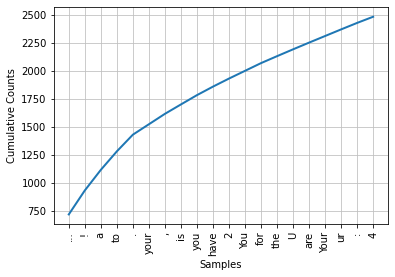

In [ ]:
# Gráfico de palavras mais frequentes sem passar pelas 'stopwords'

dist_freq.plot(20, cumulative=True)

##Realizando tratamento

In [ ]:
# Utilizando os mesmos métodos anteriores:

# Lógica utilizando função str.translate().
# Ele mapeia cada caractere da string por meio de uma tabela de tradução criada usando a função str.maketrans()

if __name__ == '__main__':
 
    ss = tokens1
    to_remove = [',','.', '$', ';', '...', '..', ';;', ';;;', '(', ')', ':', '2', '?', '!', '-', '_', 'u', 've','&', 'll',  's', 'm', 'U', 'nt', 'Ill', 'ur', 'got', '4', 'lt', 'gt', '#', 'Ok', '<', '>', 'Al','k', 'Hmmm', 'Hmm', 'hm', 'hmm', 'Haha', 'Ha', 'usf', 'l', 'th', 'l','*' ]

    chars = set(to_remove)
    filtered_listS = ';'.join(filter(lambda x: x not in chars, ss))
    print(filtered_listS)

Free;entry;in;a;wkly;comp;to;win;FA;Cup;final;FreeMsg;Hey;there;darling;it;'s;been;3;week;'s;no;WINNER;As;a;valued;network;customer;you;have;Had;your;mobile;11;months;or;more;R;entitled;SIX;chances;to;win;CASH;From;100;to;20,000;pou;URGENT;You;have;won;a;1;week;FREE;membership;i;XXXMobileMovieClub;To;use;your;credit;click;t;England;v;Macedonia;dont;miss;the;goals/team;Thanks;for;your;subscription;to;Ringtone;UK;you;07732584351;Rodger;Burns;MSG;=;We;tried;to;SMS;ac;Sptv;The;New;Jersey;Devils;and;the;Det;Congrats;1;year;special;cinema;pass;for;is;y;As;a;valued;customer;I;am;pleased;to;advise;yo;Urgent;UR;awarded;a;complimentary;trip;to;EuroD;Did;you;hear;about;the;new;\Divorce;Barbie\;'';I;Please;call;our;customer;service;representative;Your;free;ringtone;is;waiting;to;be;collected;GENT;We;are;trying;to;contact;you;Last;weeken;You;are;a;winner;have;been;specially;selected;PRIVATE;Your;2004;Account;Statement;for;077426;URGENT;Your;Mobile;No;was;awarded;å£2000;Bonu;Todays;Voda;numbers;endi

In [ ]:
# Passando para uma nova variável e dizendo para onde tiver ';' colocado anteriormente, substituir por 'espaço'.

wordsss = filtered_listS.replace(";", " ")

In [ ]:
# Vendo o resultado

wordsss

"Free entry in a wkly comp to win FA Cup final FreeMsg Hey there darling it 's been 3 week 's no WINNER As a valued network customer you have Had your mobile 11 months or more R entitled SIX chances to win CASH From 100 to 20,000 pou URGENT You have won a 1 week FREE membership i XXXMobileMovieClub To use your credit click t England v Macedonia dont miss the goals/team Thanks for your subscription to Ringtone UK you 07732584351 Rodger Burns MSG = We tried to SMS ac Sptv The New Jersey Devils and the Det Congrats 1 year special cinema pass for is y As a valued customer I am pleased to advise yo Urgent UR awarded a complimentary trip to EuroD Did you hear about the new \\Divorce Barbie\\ '' I Please call our customer service representative Your free ringtone is waiting to be collected GENT We are trying to contact you Last weeken You are a winner have been specially selected PRIVATE Your 2004 Account Statement for 077426 URGENT Your Mobile No was awarded å£2000 Bonu Todays Voda numbers e

In [ ]:
# Utilizando replace() para substituir as ' das contrações por espaço em branco

sem_aspas1 = wordsss.replace("'", "")
print(sem_aspas1)

Free entry in a wkly comp to win FA Cup final FreeMsg Hey there darling it s been 3 week s no WINNER As a valued network customer you have Had your mobile 11 months or more R entitled SIX chances to win CASH From 100 to 20,000 pou URGENT You have won a 1 week FREE membership i XXXMobileMovieClub To use your credit click t England v Macedonia dont miss the goals/team Thanks for your subscription to Ringtone UK you 07732584351 Rodger Burns MSG = We tried to SMS ac Sptv The New Jersey Devils and the Det Congrats 1 year special cinema pass for is y As a valued customer I am pleased to advise yo Urgent UR awarded a complimentary trip to EuroD Did you hear about the new \Divorce Barbie\  I Please call our customer service representative Your free ringtone is waiting to be collected GENT We are trying to contact you Last weeken You are a winner have been specially selected PRIVATE Your 2004 Account Statement for 077426 URGENT Your Mobile No was awarded å£2000 Bonu Todays Voda numbers ending 7

In [ ]:
# Importando a biblioteca String para ter acesso ao 'método' de mostrar o alfabeto e o colocar em uma lista 'a'

import string
a = list(string.ascii_lowercase)
print(a)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [ ]:
# Passando a string para lista com o 'tokenize' em uma nova variável

wordsss = word_tokenize(sem_aspas1)

In [ ]:
# Mostrando o resultado 

print(wordsss)

['Free', 'entry', 'in', 'a', 'wkly', 'comp', 'to', 'win', 'FA', 'Cup', 'final', 'FreeMsg', 'Hey', 'there', 'darling', 'it', 's', 'been', '3', 'week', 's', 'no', 'WINNER', 'As', 'a', 'valued', 'network', 'customer', 'you', 'have', 'Had', 'your', 'mobile', '11', 'months', 'or', 'more', 'R', 'entitled', 'SIX', 'chances', 'to', 'win', 'CASH', 'From', '100', 'to', '20,000', 'pou', 'URGENT', 'You', 'have', 'won', 'a', '1', 'week', 'FREE', 'membership', 'i', 'XXXMobileMovieClub', 'To', 'use', 'your', 'credit', 'click', 't', 'England', 'v', 'Macedonia', 'dont', 'miss', 'the', 'goals/team', 'Thanks', 'for', 'your', 'subscription', 'to', 'Ringtone', 'UK', 'you', '07732584351', 'Rodger', 'Burns', 'MSG', '=', 'We', 'tried', 'to', 'SMS', 'ac', 'Sptv', 'The', 'New', 'Jersey', 'Devils', 'and', 'the', 'Det', 'Congrats', '1', 'year', 'special', 'cinema', 'pass', 'for', 'is', 'y', 'As', 'a', 'valued', 'customer', 'I', 'am', 'pleased', 'to', 'advise', 'yo', 'Urgent', 'UR', 'awarded', 'a', 'complimentary'

In [ ]:
# Definindo uma nova variável para a lista filtrada das remoção das letras soltas

sem_letra1 = []

In [ ]:
# removendo as letras com uma lógica de passar palavra por palavra dentro da lista 'a' que tiver na lista 'wordss' e as ausentando da nova lista 'sem_letra'

for word in wordsss:
  if word not in a:
    sem_letra1.append(word)

In [ ]:
# Mostrando o resultado

print(sem_letra1)

['Free', 'entry', 'in', 'wkly', 'comp', 'to', 'win', 'FA', 'Cup', 'final', 'FreeMsg', 'Hey', 'there', 'darling', 'it', 'been', '3', 'week', 'no', 'WINNER', 'As', 'valued', 'network', 'customer', 'you', 'have', 'Had', 'your', 'mobile', '11', 'months', 'or', 'more', 'R', 'entitled', 'SIX', 'chances', 'to', 'win', 'CASH', 'From', '100', 'to', '20,000', 'pou', 'URGENT', 'You', 'have', 'won', '1', 'week', 'FREE', 'membership', 'XXXMobileMovieClub', 'To', 'use', 'your', 'credit', 'click', 'England', 'Macedonia', 'dont', 'miss', 'the', 'goals/team', 'Thanks', 'for', 'your', 'subscription', 'to', 'Ringtone', 'UK', 'you', '07732584351', 'Rodger', 'Burns', 'MSG', '=', 'We', 'tried', 'to', 'SMS', 'ac', 'Sptv', 'The', 'New', 'Jersey', 'Devils', 'and', 'the', 'Det', 'Congrats', '1', 'year', 'special', 'cinema', 'pass', 'for', 'is', 'As', 'valued', 'customer', 'I', 'am', 'pleased', 'to', 'advise', 'yo', 'Urgent', 'UR', 'awarded', 'complimentary', 'trip', 'to', 'EuroD', 'Did', 'you', 'hear', 'about',

In [ ]:
# Agora verificando a frequência dos termos após o tratamento

dist_freq = FreqDist(sem_letra1) #Definindo uma variável com elementos aceitos pelo FreqDist (palavras)
print(dist_freq) #Output quantitativo se samples

<FreqDist with 1708 samples and 6071 outcomes>


In [ ]:
# Exibindo os 20 mais comuns
dist_freq.most_common(20)

[('to', 165),
 ('your', 93),
 ('is', 84),
 ('you', 83),
 ('have', 76),
 ('You', 69),
 ('for', 69),
 ('the', 62),
 ('are', 60),
 ('Your', 59),
 ('of', 52),
 ('FREE', 51),
 ('call', 49),
 ('our', 42),
 ('and', 41),
 ('or', 40),
 ('from', 39),
 ('in', 38),
 ('URGENT', 38),
 ('mobile', 36)]

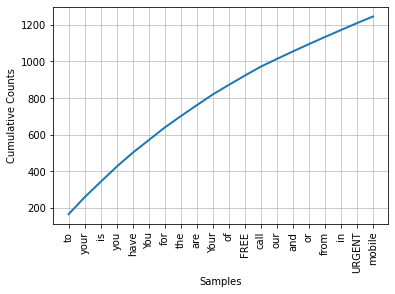

In [ ]:
# Gráfico de palavras mais frequentes sem passar pelas 'stopwords'

dist_freq.plot(20, cumulative=True)

###Filtrando com Stopwords

In [ ]:
# Criando uma lista para colocar as palavras filtradas
filtered_stopwords1 = []

In [ ]:
# Lógica para cara palavra na lista feita anterior, a máquina verificará se está nas stopwords e adicionará na lista se não estiver.
for word in sem_letra1:
  if word not in stop_words:
    filtered_stopwords1.append(word)

In [ ]:
# Exibindo a lista de palavras filtradas
print(filtered_stopwords1)

['Free', 'entry', 'wkly', 'comp', 'win', 'FA', 'Cup', 'final', 'FreeMsg', 'Hey', 'darling', '3', 'week', 'WINNER', 'As', 'valued', 'network', 'customer', 'Had', 'mobile', '11', 'months', 'R', 'entitled', 'SIX', 'chances', 'win', 'CASH', 'From', '100', '20,000', 'pou', 'URGENT', 'You', '1', 'week', 'FREE', 'membership', 'XXXMobileMovieClub', 'To', 'use', 'credit', 'click', 'England', 'Macedonia', 'dont', 'miss', 'goals/team', 'Thanks', 'subscription', 'Ringtone', 'UK', '07732584351', 'Rodger', 'Burns', 'MSG', '=', 'We', 'tried', 'SMS', 'ac', 'Sptv', 'The', 'New', 'Jersey', 'Devils', 'Det', 'Congrats', '1', 'year', 'special', 'cinema', 'pass', 'As', 'valued', 'customer', 'I', 'pleased', 'advise', 'yo', 'Urgent', 'UR', 'awarded', 'complimentary', 'trip', 'EuroD', 'Did', 'hear', 'new', '\\Divorce', 'Barbie\\', 'I', 'Please', 'call', 'customer', 'service', 'representative', 'Your', 'free', 'ringtone', 'waiting', 'collected', 'GENT', 'We', 'trying', 'contact', 'Last', 'weeken', 'You', 'winne

In [ ]:
#Utilizando novamente o nltk para gráfico de linha: palavra x frequência
dist_freq = FreqDist(filtered_stopwords1) #Definindo uma variável com elementos aceitos pelo FreqDist (palavras)
print(dist_freq) #Output quantitativo se samples

<FreqDist with 1626 samples and 4609 outcomes>


In [ ]:
# Exibindo os 50 mais comuns
dist_freq.most_common(50)

[('You', 69),
 ('Your', 59),
 ('FREE', 51),
 ('call', 49),
 ('URGENT', 38),
 ('mobile', 36),
 ('awarded', 34),
 ('contact', 33),
 ('We', 31),
 ('I', 31),
 ('service', 31),
 ('new', 30),
 ('Nokia', 30),
 ('1', 26),
 ('Please', 26),
 ('This', 26),
 ('week', 23),
 ('customer', 21),
 ('Get', 20),
 ('500', 19),
 ('claim', 19),
 ('Free', 18),
 ('win', 17),
 ('Urgent', 17),
 ('Mobile', 17),
 ('PRIVATE', 16),
 ('Account', 16),
 ('Statement', 16),
 ('text', 16),
 ('want', 16),
 ('Hi', 16),
 ('To', 15),
 ('tried', 15),
 ('New', 15),
 ('free', 15),
 ('trying', 15),
 ('Todays', 15),
 ('Ur', 15),
 ('Txt', 15),
 ('Call', 15),
 ('number', 15),
 ('know', 15),
 ('The', 14),
 ('ringtone', 14),
 ('Congratulations', 14),
 ('tone', 14),
 ('chance', 14),
 ('Do', 14),
 ('entry', 13),
 ('Thanks', 13)]

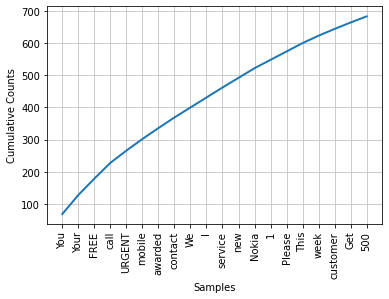

In [ ]:
# Gráfico de palavras mais frequentes sem passar pelas 'stopwords'

dist_freq.plot(20, cumulative=True)

Realizando outro tratamento para remoção de palavras irrelevantes

In [ ]:
c = ['I', 'l', 'This', 'Hi', '1', '2', '3','Do', 'Ur', '500', 'The', 'To', 'FA', 'As', 'as', 's', 'nt', 'comp', '11', 'R', '100', 'pou', 'dont', '=', 'ac', 'yo', 'UR', 'Did', '2004', 'No', 'å£2000', '7548', 'Q', 'loca', 'Why', 'Ye', '32/F', '-PLS', 'Are', '500', '2004', 'Is', 'loo', '25', 'HMV', 'vou', 'Abe', 'conte', 'Had', 'wee', 'ca', 'ju', 'en', 'Wit', '3650','å£75,000', 'may', '+123', '40', '150p', 'eg', '@']

In [ ]:
u_filtro1 = []

In [ ]:
# Lógica para cara palavra na lista feita anterior, a máquina verificará se está nas stopwords e adicionará na lista se não estiver.
for word in filtered_stopwords1:
  if word not in c:
    u_filtro1.append(word)

In [ ]:
# Mostrando resultado

print(u_filtro1)

['Free', 'entry', 'wkly', 'win', 'Cup', 'final', 'FreeMsg', 'Hey', 'darling', 'week', 'WINNER', 'valued', 'network', 'customer', 'mobile', 'months', 'entitled', 'SIX', 'chances', 'win', 'CASH', 'From', '20,000', 'URGENT', 'You', 'week', 'FREE', 'membership', 'XXXMobileMovieClub', 'use', 'credit', 'click', 'England', 'Macedonia', 'miss', 'goals/team', 'Thanks', 'subscription', 'Ringtone', 'UK', '07732584351', 'Rodger', 'Burns', 'MSG', 'We', 'tried', 'SMS', 'Sptv', 'New', 'Jersey', 'Devils', 'Det', 'Congrats', 'year', 'special', 'cinema', 'pass', 'valued', 'customer', 'pleased', 'advise', 'Urgent', 'awarded', 'complimentary', 'trip', 'EuroD', 'hear', 'new', '\\Divorce', 'Barbie\\', 'Please', 'call', 'customer', 'service', 'representative', 'Your', 'free', 'ringtone', 'waiting', 'collected', 'GENT', 'We', 'trying', 'contact', 'Last', 'weeken', 'You', 'winner', 'specially', 'selected', 'PRIVATE', 'Your', 'Account', 'Statement', '077426', 'URGENT', 'Your', 'Mobile', 'awarded', 'Bonu', 'Toda

In [ ]:
#Refazendo a frequência
dist_freq = FreqDist(u_filtro1) #Definindo uma variável com elementos aceitos pelo FreqDist (palavras)
print(dist_freq) #Output quantitativo se samples

<FreqDist with 1571 samples and 4241 outcomes>


In [ ]:
# Exibindo os 20 mais comuns
dist_freq.most_common(20)

[('You', 69),
 ('Your', 59),
 ('FREE', 51),
 ('call', 49),
 ('URGENT', 38),
 ('mobile', 36),
 ('awarded', 34),
 ('contact', 33),
 ('We', 31),
 ('service', 31),
 ('new', 30),
 ('Nokia', 30),
 ('Please', 26),
 ('week', 23),
 ('customer', 21),
 ('Get', 20),
 ('claim', 19),
 ('Free', 18),
 ('win', 17),
 ('Urgent', 17)]

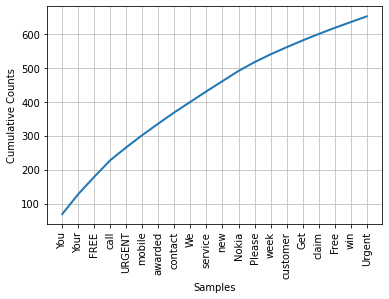

In [ ]:
# Agora tendo um resultado menos poluído por caracteres que não são úteis, podemos prosseguir.

dist_freq.plot(20, cumulative=True)

### Fazendo a Nuvem de Palavras

In [ ]:
# Chamando a variável mais recente de tratamentos finalizada e a transformando em outra variável com formato String

filtroStr1 = str(u_filtro1)

# Vendo de o resultado continua igual. Sim, porém temos que tratar as aspas agora.
print(filtroStr1)

['Free', 'entry', 'wkly', 'win', 'Cup', 'final', 'FreeMsg', 'Hey', 'darling', 'week', 'WINNER', 'valued', 'network', 'customer', 'mobile', 'months', 'entitled', 'SIX', 'chances', 'win', 'CASH', 'From', '20,000', 'URGENT', 'You', 'week', 'FREE', 'membership', 'XXXMobileMovieClub', 'use', 'credit', 'click', 'England', 'Macedonia', 'miss', 'goals/team', 'Thanks', 'subscription', 'Ringtone', 'UK', '07732584351', 'Rodger', 'Burns', 'MSG', 'We', 'tried', 'SMS', 'Sptv', 'New', 'Jersey', 'Devils', 'Det', 'Congrats', 'year', 'special', 'cinema', 'pass', 'valued', 'customer', 'pleased', 'advise', 'Urgent', 'awarded', 'complimentary', 'trip', 'EuroD', 'hear', 'new', '\\Divorce', 'Barbie\\', 'Please', 'call', 'customer', 'service', 'representative', 'Your', 'free', 'ringtone', 'waiting', 'collected', 'GENT', 'We', 'trying', 'contact', 'Last', 'weeken', 'You', 'winner', 'specially', 'selected', 'PRIVATE', 'Your', 'Account', 'Statement', '077426', 'URGENT', 'Your', 'Mobile', 'awarded', 'Bonu', 'Toda

In [ ]:
# Retirando as aspas
sem_aspasSPAM = filtroStr1.replace("'", "")

In [ ]:
# Conferindo o resultado

print(sem_aspasSPAM)

[Free, entry, wkly, win, Cup, final, FreeMsg, Hey, darling, week, WINNER, valued, network, customer, mobile, months, entitled, SIX, chances, win, CASH, From, 20,000, URGENT, You, week, FREE, membership, XXXMobileMovieClub, use, credit, click, England, Macedonia, miss, goals/team, Thanks, subscription, Ringtone, UK, 07732584351, Rodger, Burns, MSG, We, tried, SMS, Sptv, New, Jersey, Devils, Det, Congrats, year, special, cinema, pass, valued, customer, pleased, advise, Urgent, awarded, complimentary, trip, EuroD, hear, new, \\Divorce, Barbie\\, Please, call, customer, service, representative, Your, free, ringtone, waiting, collected, GENT, We, trying, contact, Last, weeken, You, winner, specially, selected, PRIVATE, Your, Account, Statement, 077426, URGENT, Your, Mobile, awarded, Bonu, Todays, Voda, numbers, ending, selected, Sunshine, Quiz, Wkly, Win, top, Sony, DVD, player, Want, get, laid, tonight, Want, real, Dogging, You, rcv, msgs, chat, svc, ...., FreeMsg, replied, text, Customer,

In [ ]:
# lista de stopword
stopwordsSPAM = set(STOPWORDS)

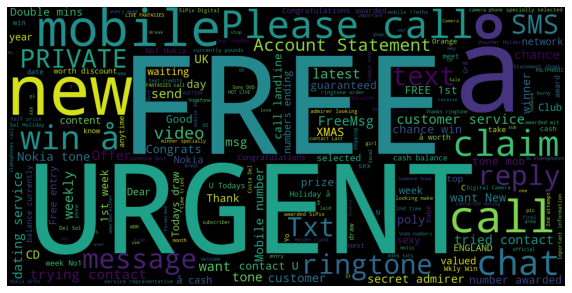

In [ ]:
# gerar uma wordcloud das palavras de SPAM
wordcloud1 = WordCloud(stopwords=stopwordsSPAM,
                      background_color="black",
                      width=1600, height=800).generate(sem_aspasSPAM)
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud1, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud1);
wordcloud1.to_file("airbnb_summary_wordcloud.png")

In [ ]:
new_text1 = nltk.Text(u_filtro1)
print(new_text1)

<Text: Free entry wkly win Cup final FreeMsg Hey...>


In [ ]:
new_text1.collocations()

Account Statement; 2003 Account; Please call; trying contact; secret
admirer; numbers ending; tried contact; dating service; cash-balance
currently; å£150 worth; worth discount; Costa Del; Del Sol; SiPix
Digital; chance win; Sol Holiday; 1st week; Todays draw; looking make;
Sony DVD


### Fazendo separação por funções gramaticais

In [ ]:
# Chamando a variável e já fazendo a transformação

words_tagged1 = nltk.pos_tag(u_filtro1)

In [ ]:
# Exibindo
print(words_tagged1)

In [ ]:
# Fazendo a análise com Entities

entities1 = nltk.chunk.ne_chunk(words_tagged1)
print(entities1)

# Separando palavras por funções gramaticais

In [ ]:
import nltk
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [ ]:
# A bilioteca necessária para a pos_tag já está dentro do nltk, então não é preciso importar novamente

words_tagged = nltk.pos_tag(u_filtro)


In [ ]:
# Exibindo
print(words_tagged)

[('Go', 'VB'), ('jurong', 'JJ'), ('point', 'NN'), ('crazy', 'NN'), ('Available', 'NNP'), ('Joking', 'NNP'), ('Free', 'NNP'), ('entry', 'NN'), ('wkly', 'VBD'), ('comp', 'NN'), ('win', 'NN'), ('FA', 'NNP'), ('Cup', 'NNP'), ('final', 'JJ'), ('say', 'VBP'), ('early', 'JJ'), ('already', 'RB'), ('say', 'VBP'), ('think', 'NN'), ('goes', 'VBZ'), ('lives', 'VBZ'), ('arou', 'JJ'), ('FreeMsg', 'NNP'), ('darling', 'VBG'), ('3', 'CD'), ('week', 'NN'), ('Even', 'RB'), ('brother', 'RBR'), ('like', 'JJ'), ('speak', 'NN'), ('As', 'IN'), ('per', 'IN'), ('request', 'NN'), ('Melle', 'NNP'), ('Melle', 'NNP'), ('Oru', 'NNP'), ('Minnaminu', 'NNP'), ('WINNER', 'NNP'), ('As', 'IN'), ('valued', 'VBN'), ('network', 'NN'), ('customer', 'NN'), ('Had', 'NNP'), ('mobile', 'CC'), ('11', 'CD'), ('months', 'NNS'), ('R', 'NNP'), ('entitled', 'VBD'), ('gon', 'NN'), ('home', 'NN'), ('soon', 'RB'), ('want', 'JJ'), ('talk', 'NN'), ('SIX', 'NNP'), ('chances', 'NNS'), ('win', 'VBP'), ('CASH', 'NNP'), ('From', 'NNP'), ('100', 

In [ ]:
# Tags e seus significados
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

# Entities

In [ ]:
entities = nltk.chunk.ne_chunk(words_tagged)
print(entities)

(S
  Go/VB
  jurong/JJ
  point/NN
  crazy/NN
  (PERSON Available/NNP Joking/NNP Free/NNP)
  entry/NN
  wkly/VBD
  comp/NN
  win/NN
  FA/NNP
  Cup/NNP
  final/JJ
  say/VBP
  early/JJ
  already/RB
  say/VBP
  think/NN
  goes/VBZ
  lives/VBZ
  arou/JJ
  (ORGANIZATION FreeMsg/NNP)
  darling/VBG
  3/CD
  week/NN
  Even/RB
  brother/RBR
  like/JJ
  speak/NN
  As/IN
  per/IN
  request/NN
  (PERSON Melle/NNP Melle/NNP Oru/NNP Minnaminu/NNP)
  WINNER/NNP
  As/IN
  valued/VBN
  network/NN
  customer/NN
  Had/NNP
  mobile/CC
  11/CD
  months/NNS
  R/NNP
  entitled/VBD
  gon/NN
  home/NN
  soon/RB
  want/JJ
  talk/NN
  SIX/NNP
  chances/NNS
  win/VBP
  (ORGANIZATION CASH/NNP)
  From/NNP
  100/CD
  20,000/CD
  pou/NN
  URGENT/NNP
  1/CD
  week/NN
  (ORGANIZATION FREE/NNP)
  membership/NN
  searching/VBG
  right/JJ
  words/NNS
  HAVE/VBP
  (ORGANIZATION DATE/VBN)
  ON/NNP
  SUNDAY/NNP
  WITH/NNP
  WILL/NNP
  XXXMobileMovieClub/NNP
  To/TO
  use/VB
  credit/NN
  click/NN
  watching/VBG
  remember/VB


# Treebank

Este código funciona somente no PyCharm ou outra IDE. O Google Colab não funciona por questões gráficas.

In [ ]:
# Variável com frase de exemplo
fraseTree = "I HAVE A DATE ON SUNDAY WITH WILL!!"

# criando variável para armazenar os tokens da fraseTree
words_Tree = word_tokenize(fraseTree)
words_Tree

# Fazendo download de uma biblioteca
nltk.download("averaged_perceptron_tagger")

# Definindo nova variável para armazenar a variável words_Tree receber suas 'tags'
fraseTree = nltk.pos_tag(words_Tree)
fraseTree

# Regra de gramática
grammar = "NP: {<DT>?<JJ>*<NN>}"

# Fazendo a variável entender de gramática, acredito
chunk_parser = nltk.RegexpParser(grammar)

# Fazendo o código passar o conhecimento para a variável 'tree'
tree = chunk_parser.parse(fraseTree)

# Desenhar a variável
tree.draw()

# Stemming

In [ ]:
# Importando bibliotecas para stemming, que é reduzir a palavra para seu mínimo/sua raiz. Ex.: helping e helper podem ser diminuidas a 'help'.
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [ ]:
# Criando o stemmer
stemmer = PorterStemmer()

In [ ]:
# Agora vamos pegar o resultado da lista filtrada e adicioná-la aqui para o stemmer
words = filtered_list

In [ ]:
# Criando variável para as palavras reduzidas e dizendo para reduzir para por palavra nas palavras da lista filtrada (words)
stemmed_words = [stemmer.stem(word) for word in words]

In [ ]:
# Exibindo a lista stemmed_words
print(stemmed_words)

['go', 'jurong', 'point', ',', 'crazi', '..', 'avail', '...', 'ok', 'lar', '...', 'joke', 'wif', 'u', 'oni', '...', 'free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', '...', 'u', 'dun', 'say', 'earli', 'hor', '...', 'u', 'c', 'alreadi', 'say', '...', 'nah', "n't", 'think', 'goe', 'usf', ',', 'live', 'arou', '...', 'freemsg', 'hey', 'darl', "'s", '3', 'week', "'s", '...', 'even', 'brother', 'like', 'speak', '.', '...', 'per', 'request', "'mell", 'mell', '(', 'oru', 'minnaminu', '...', 'winner', '!', '!', 'valu', 'network', 'custom', '...', 'mobil', '11', 'month', '?', 'u', 'r', 'entitl', '...', "'m", 'gon', 'na', 'home', 'soon', "n't", 'want', 'talk', '...', 'six', 'chanc', 'win', 'cash', '!', '100', '20,000', 'pou', '...', 'urgent', '!', '1', 'week', 'free', 'membership', '...', "'ve", 'search', 'right', 'word', '...', 'date', 'sunday', '!', '!', 'xxxmobilemovieclub', ':', 'use', 'credit', ',', 'click', '...', 'oh', 'k', '...', "'m", 'watch', ':', ')', 'eh', 'u', 'remem

In [ ]:
""" Há possíveis erros com o stemmed, como o Understemming, que é quando as palavras deveriam ser reduzidas a mesma palavra e por alguma razão não foram, caracterizando falso negativo.
E também o Overstemming, que é quando acontece o contrário: palavras diferentes são reduzidas a mesma palavra. Este é um falso positivo. 
Mais a frente poderemos separar melhor e realizar análises com o Lemmatizer, que faz o mesmo, porém com algumas coisas diferentes. """

# Lemmatizing

In [ ]:
# Utilizando "Lemma"
# Basicamente, uma palavra que representa um grupo inteiro de palavras que é chamado de "lexema"
# Exemplo: se procurar pela palavra "mistura" no dicionário, terá de procurar em "misturar" e acharia "misturando" na lista.
# Então o "mistura" seria o 'Lemma' e o "misturando" seria o 'lexeme'.
# Então, por fim, quando você "Lemmatiza" uma palavra, você está reduzindo a palavra ao "Lemma" dela.


from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

#Preparando o Lemmatizer
lemmatizer = WordNetLemmatizer()
#words = word_tokenize(frases) # Linkando o método com a variável de string 'frase'

# Criando variável para lematizar as palavras na lista palavra por palavra.
lemmatized_words = [lemmatizer.lemmatize(word) for word in u_filtro]


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
lemmatized_words

['Go',
 'jurong',
 'point',
 'crazy',
 'Available',
 'Joking',
 'Free',
 'entry',
 'wkly',
 'comp',
 'win',
 'FA',
 'Cup',
 'final',
 'say',
 'early',
 'already',
 'say',
 'think',
 'go',
 'life',
 'arou',
 'FreeMsg',
 'darling',
 '3',
 'week',
 'Even',
 'brother',
 'like',
 'speak',
 'As',
 'per',
 'request',
 'Melle',
 'Melle',
 'Oru',
 'Minnaminu',
 'WINNER',
 'As',
 'valued',
 'network',
 'customer',
 'Had',
 'mobile',
 '11',
 'month',
 'R',
 'entitled',
 'gon',
 'home',
 'soon',
 'want',
 'talk',
 'SIX',
 'chance',
 'win',
 'CASH',
 'From',
 '100',
 '20,000',
 'pou',
 'URGENT',
 '1',
 'week',
 'FREE',
 'membership',
 'searching',
 'right',
 'word',
 'HAVE',
 'DATE',
 'ON',
 'SUNDAY',
 'WITH',
 'WILL',
 'XXXMobileMovieClub',
 'To',
 'use',
 'credit',
 'click',
 'watching',
 'remember',
 'spell',
 'name',
 'Yes',
 'Fine',
 'thatåÕs',
 'way',
 'feel',
 'ThatåÕs',
 'way',
 'England',
 'Macedonia',
 'dont',
 'miss',
 'goals/team',
 'Is',
 'seriously',
 'spell',
 'name',
 'I\x89Û÷m',
 '

In [ ]:
# Repassando as palavras 'Lemmatizadas' para uma nova variável
new_text = nltk.Text(lemmatized_words)

In [ ]:
# Expressões mais localizadas pelo 'Lemma'
# Lembrando que o 'Lemma' pode ter alterado as palavras para formas mais curtas.
colocacoes = new_text.collocations()

Account Statement; Sorry call; call later; 2003 Account; trying
contact; Please call; tried contact; dating service; secret admirer;
Pls send; å£150 worth; chance win; cash-balance currently; 500 pound;
worth discount; Costa Del; Del Sol; SiPix Digital; Sol Holiday; Todays
draw


# Machine Learningh

In [ ]:
import nltk
import re

# bibliotecas de Aprendizagem de máquina
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Importando as técnicas de aprendizagem (Classificadores) 
from sklearn.tree import DecisionTreeClassifier #árvore de decisão
from sklearn.svm import SVC #SVM
from sklearn.naive_bayes import GaussianNB #Naive Bayes 
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn.linear_model import LogisticRegression #Regressão Logística
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neural_network import MLPClassifier #Multlayer Perceptron Rede Neural

# bibliotecas de Aprendizagem de máquina
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score #
from sklearn.model_selection import StratifiedKFold #
from sklearn.model_selection import KFold #

# Importanto técnicas de avaliação de modelos 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics #

In [ ]:
# Processo de organização dos dados

dfM = df['Classe']

In [ ]:
dfM.head(5)

0     ham
1     ham
2    spam
3     ham
4     ham
Name: Classe, dtype: object

In [ ]:
dados_selecao = df[["Classe", "SMS"]]

In [ ]:
# HOLDOUT
# Separação aleatória em conjuntos de treino e teste  (Treino = Para etapa de aprendizagem;  Teste = Para avaliar  o desempenho do modelo em novos dados)
array = dados_selecao.values
X = array[:, 2:2].astype(float)  #variáveis explicativas 
Y = array[:, 1]  #variável resposta
test_size = 0.50

np.random.seed(7) #fixar aleatoriedade para reproução 
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=test_size)

####----

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_TFIDF = TfidfVectorizer(sublinear_tf=True) 
X_TFIDF = vectorizer_TFIDF.fit_transform(lemmatized_words) #essa base contem as mensagens já tratadas

In [ ]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=30, test_size=0.2,
     random_state=0)
splitDivision = ss.split(X_TFIDF)

In [ ]:
accuracy = []
precision = []
recall = []

In [ ]:
labels = df['Classe']

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import sklearn

In [ ]:
labels = np.array(lemmatized_words)
for train_index, test_index in splitDivision: #splitDivision executa 30x particionando treino e teste
    x_train = X_TFIDF[train_index] 
    y_train = labels[train_index] 
    x_test = X_TFIDF[test_index]
    y_test = labels[test_index]

    print("Starting training...")
    clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=150)
    #clf = MultinomialNB() #exemplos de algoritmos
    #clf = BernoulliNB()
    #clf = SVC()
  
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)

    #print(y_pred)
    #print(y_test)

    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred, average=None)
    rec = metrics.recall_score(y_test, y_pred, average=None)
    mc = sklearn.metrics.confusion_matrix(y_test, y_pred)
    g=0
    somaP = 0
    somaR = 0
    while(g<len(prec)):
        somaP = somaP + prec[g]
        somaR = somaR + rec[g]
        g=g+1
    precTotal = (somaP/len(prec))
    recTotal = (somaR/len(prec))

    print(acc)
    print(prec)
    print(rec)
    accuracy.append(acc)
    precision.append(precTotal)
    recall.append(recTotal)

Starting training...


In [ ]:
# Machine Learning

# bibliotecas de Aprendizagem de máquina
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Importando as técnicas de aprendizagem (Classificadores) 
from sklearn.tree import DecisionTreeClassifier #árvore de decisão
from sklearn.svm import SVC #SVM
from sklearn.naive_bayes import GaussianNB #Naive Bayes 
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn.linear_model import LogisticRegression #Regressão Logística
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neural_network import MLPClassifier #Multlayer Perceptron Rede Neural

# bibliotecas de Aprendizagem de máquina
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score #
from sklearn.model_selection import StratifiedKFold #
from sklearn.model_selection import KFold #

# Importanto técnicas de avaliação de modelos 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics #

# Método para ajudar a passar a base no padrão adequado
from sklearn.feature_extraction.text import TfidfVectorizer
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [ ]:
# Definir a partição de treino e o tamanho

from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=30, test_size=0.25,
     random_state=0)
splitDivision = ss.split(X_TFIDF) 

accuracy = []
precision = []

labels = np.array(labels)
for train_index, test_index in splitDivision:
    x_train = X_TFIDF[train_index]
    y_train = labels[train_index]
    x_test = X_TFIDF[test_index]
    y_test = labels[test_index]

IndexError: ignored

In [ ]:
# Acurácia (medida geral)

accuracy_score(y_test, y_pred)

metrics.acurrace_score()

In [ ]:
# Precisão (para analisar o desbalanceamento da classe de interesse)

prediction_score(y_test, y_pred)

In [ ]:
# Treinando modelos 
# Preparação do modelo 1 =  Árvore de Decisão
model1 = DecisionTreeClassifier()
model1.fit(X_treino, Y_treino)


# Preparação do modelo 3 = KNN
model3 = KNeighborsClassifier(n_neighbors=7)
model3.fit(X_treino, Y_treino)

# Preparação do modelo 4 = Naive Bayes
model4 = GaussianNB()
model4.fit(X_treino, Y_treino)

# Preparação do modelo 5 = Regressão Logística
model5 = LogisticRegression()
model5.fit(X_treino, Y_treino)

# Preparação do modelo 6 = Random Forest
model6 = RandomForestClassifier()
model6.fit(X_treino, Y_treino)

# Preparação do modelo 7 = MLP Rede Neural
model7 = MLPClassifier()
model7.fit(X_treino, Y_treino)


#Referências



*   https://realpython.com/nltk-nlp-python/
*   https://www.nltk.org/



